In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [38]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv',nrows=20)
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [39]:
df.head(20)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [40]:
print(df)

          Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0   2018-09-28  234.05  235.95  230.20  233.50  233.75               3069914   
1   2018-09-27  234.55  236.80  231.10  233.80  233.25               5082859   
2   2018-09-26  240.00  240.00  232.50  235.00  234.25               2240909   
3   2018-09-25  233.30  236.75  232.00  236.25  236.10               2349368   
4   2018-09-24  233.55  239.20  230.75  234.00  233.30               3423509   
5   2018-09-21  235.00  237.00  227.95  233.75  234.60               5395319   
6   2018-09-19  235.95  237.20  233.45  234.60  234.90               1362058   
7   2018-09-18  237.90  239.25  233.50  235.50  235.05               2614794   
8   2018-09-17  233.15  238.00  230.25  236.40  236.60               3170894   
9   2018-09-14  223.45  236.70  223.30  234.00  233.95               6377909   
10  2018-09-12  216.35  223.70  212.65  221.65  222.65               4570939   
11  2018-09-11  222.50  225.40  214.85  

In [41]:
df.tail(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
15,2018-09-05,222.00,224.60,215.20,222.10,222.4,3023097,6674.93
16,2018-09-04,238.20,238.20,222.60,223.45,223.7,3554859,8163.82
17,2018-09-03,236.00,243.55,235.05,236.85,236.7,5242852,12538.39
18,2018-08-31,237.00,239.75,232.95,234.65,234.3,3353833,7913.21
19,2018-08-30,235.35,237.30,232.10,237.30,236.0,1921327,4516.57


In [7]:
df1 = df.sort_values(by='Date')
df1.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [8]:
df1 = df.sort_values(by='High')
df1.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1699,2011-11-23,82.60,82.80,80.30,81.00,80.95,1088448,886.44
1697,2011-11-25,82.40,83.00,81.10,81.60,81.55,1090160,896.31
1698,2011-11-24,81.10,83.40,80.00,83.40,82.40,1288429,1058.14
1700,2011-11-22,82.10,83.45,81.55,83.05,82.70,540870,447.10
1729,2011-10-07,82.55,83.50,82.10,82.60,82.55,845994,701.08


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2035 entries, 1699 to 174
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 143.1+ KB


In [10]:
types = df1.dtypes
print(types)

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object


In [11]:
#Count total number of classes in Data
class_counts = df1.groupby('High').size()
print(class_counts)

High
82.80     1
83.00     1
83.40     1
83.45     1
83.50     1
         ..
319.20    1
319.65    1
326.90    1
328.35    1
328.75    1
Length: 1257, dtype: int64


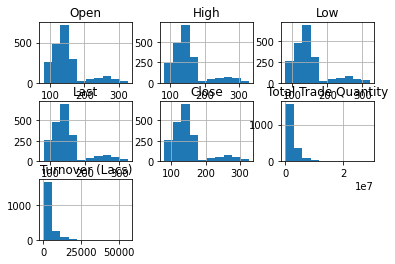

In [12]:
# Histogram plot
from matplotlib import pyplot
df1.hist()
pyplot.show()

In [13]:
df1.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

In [14]:
columns = ['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)']
df1.columns = columns
df1.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1699,2011-11-23,82.60,82.80,80.30,81.00,80.95,1088448,886.44
1697,2011-11-25,82.40,83.00,81.10,81.60,81.55,1090160,896.31
1698,2011-11-24,81.10,83.40,80.00,83.40,82.40,1288429,1058.14
1700,2011-11-22,82.10,83.45,81.55,83.05,82.70,540870,447.10
1729,2011-10-07,82.55,83.50,82.10,82.60,82.55,845994,701.08


In [15]:
df1.duplicated().value_counts()

False    2035
dtype: int64

In [16]:
df1.drop_duplicates(inplace=True)

In [17]:
df1.isnull()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1699,False,False,False,False,False,False,False,False
1697,False,False,False,False,False,False,False,False
1698,False,False,False,False,False,False,False,False
1700,False,False,False,False,False,False,False,False
1729,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
179,False,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False,False
173,False,False,False,False,False,False,False,False
175,False,False,False,False,False,False,False,False


In [18]:
df1.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


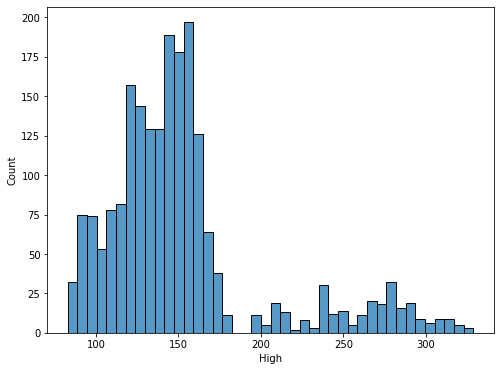

In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(df1['High'])
plt.show()

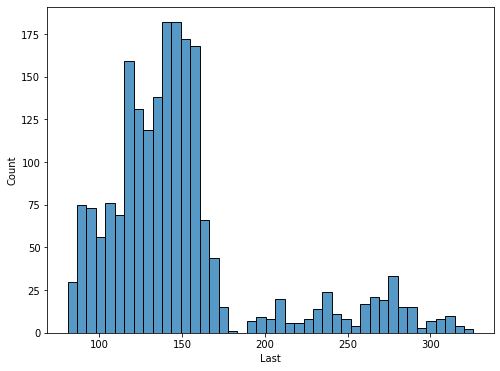

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(df1['Last'])
plt.show()

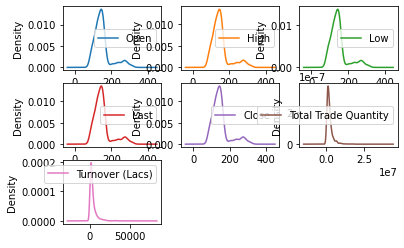

In [21]:
df1.plot(kind='density' ,subplots=True, layout=(3,3), sharex=False)
pyplot.show()

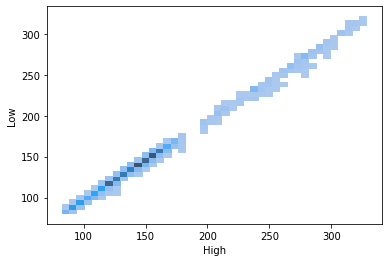

In [22]:
sns.histplot(x='High', y='Low', data=df1)

In [23]:
df1.reset_index(inplace=True)

In [24]:
x=df1.drop('High', axis=1)
y =df1['High']

In [25]:
print(x)

      index        Date    Open     Low    Last   Close  Total Trade Quantity  \
0      1699  2011-11-23   82.60   80.30   81.00   80.95               1088448   
1      1697  2011-11-25   82.40   81.10   81.60   81.55               1090160   
2      1698  2011-11-24   81.10   80.00   83.40   82.40               1288429   
3      1700  2011-11-22   82.10   81.55   83.05   82.70                540870   
4      1729  2011-10-07   82.55   82.10   82.60   82.55                845994   
...     ...         ...     ...     ...     ...     ...                   ...   
2030    179  2018-01-08  314.65  312.20  317.45  317.60               2171903   
2031    178  2018-01-09  317.60  314.00  314.70  315.30               2411068   
2032    173  2018-01-16  323.00  311.45  317.60  316.40               4683847   
2033    175  2018-01-12  315.05  315.00  325.95  325.75              14484043   
2034    174  2018-01-15  327.70  321.65  323.70  323.00               4519030   

      Turnover (Lacs)  
0  

In [26]:
# Splitting the Dataset into the Training set and Test set

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [27]:
print(X_test)

      index        Date    Open     Low    Last   Close  Total Trade Quantity  \
611     744  2015-09-24  124.80  123.65  124.00  124.20               1011551   
111    1671  2012-01-03   91.80   91.60   94.80   94.55               1175311   
1185    379  2017-03-21  147.00  145.10  145.60  145.90               2955856   
1510    920  2015-01-12  156.35  155.20  156.85  157.35               1647105   
771     813  2015-06-18  132.95  132.30  133.20  132.60                970883   
...     ...         ...     ...     ...     ...     ...                   ...   
494    1628  2012-03-03  120.70  117.90  120.60  120.40                249882   
1954     58  2018-07-04  281.00  275.35  277.70  277.30               3598212   
1412   1232  2013-10-03  151.00  150.70  154.90  155.20               3537917   
1691    287  2017-08-02  168.00  164.20  164.85  165.10               2009220   
1556   1467  2012-10-23  160.10  156.60  157.50  156.95               1381693   

      Turnover (Lacs)  
611

In [28]:
print(Y_test)

611     125.95
111      94.80
1185    148.45
1510    158.70
771     133.90
         ...  
494     121.50
1954    281.00
1412    155.80
1691    168.55
1556    161.00
Name: High, Length: 407, dtype: float64


In [29]:
print(X_test.head())

      index        Date    Open     Low    Last   Close  Total Trade Quantity  \
611     744  2015-09-24  124.80  123.65  124.00  124.20               1011551   
111    1671  2012-01-03   91.80   91.60   94.80   94.55               1175311   
1185    379  2017-03-21  147.00  145.10  145.60  145.90               2955856   
1510    920  2015-01-12  156.35  155.20  156.85  157.35               1647105   
771     813  2015-06-18  132.95  132.30  133.20  132.60                970883   

      Turnover (Lacs)  
611           1258.15  
111           1102.25  
1185          4332.96  
1510          2590.49  
771           1292.67  


In [30]:
print(Y_test.head())

611     125.95
111      94.80
1185    148.45
1510    158.70
771     133.90
Name: High, dtype: float64


In [31]:
print(X_train.head())

      index        Date    Open     Low    Last   Close  Total Trade Quantity  \
1605    995  2014-09-17  160.70  156.90  161.10  161.60               2748845   
1686   1208  2013-11-07  164.40  159.05  161.50  160.35               2358582   
1752    299  2017-07-17  174.25  172.60  176.95  177.00               4882663   
745     739  2015-10-05  131.45  130.10  131.85  131.85                746173   
1335    873  2015-03-20  153.75  149.00  149.75  149.95               1834524   

      Turnover (Lacs)  
1605          4396.31  
1686          3874.98  
1752          8646.00  
745            980.21  
1335          2762.52  


In [32]:
#printing the shapes of x_test,x_train,y_test and y_train

print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_train:",Y_train.shape)
print("Y_test:",Y_test.shape)

X_train: (1628, 8)
X_test: (407, 8)
Y_train: (1628,)
Y_test: (407,)


In [33]:
from sklearn.svm import SVC
model = []
model.append(('SVC', SVC(gamma='auto')))